<a href="https://colab.research.google.com/github/vkmb-17/Arq/blob/main/Web_Scraping_BITCOIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BITCOIN EM USD - VICTOR KAUAN MORENO DE BRITO

### Dados coletados entre 13h e 18h de 28/06/2023

#IMPORTAÇAO DAS BIBLIOTECAS

In [ ]:
!pip install requests                                                            # Instalação de REQUESTS
!pip install beautifulsoup4                                                      # Beautifulsoup4
!pip install psycopg2-binary                                                     # Instalação de PSYCOPG2-BINARY

#_________________________________________________________________________________________________________________________

import time                                                                      # Importação de TIME
import psycopg2                                                                  # Importação de PSYCOPG2
import requests                                                                  # Importação de REQUESTS
import datetime                                                                  # Importação de DATETIME
import bs4 as bs                                                                 # Importação de BS4
import pandas as pd                                                              # Importação de PANDAS
import seaborn as sns                                                            # Importação de SEABORN
from bs4 import BeautifulSoup                                                    # Importação de BEAUTIFULSOUP
import matplotlib.pyplot as plt                                                  # Importação de MATPLOTLIB

#_________________________________________________________________________________________________________________________

sns.set()                                                                        # Definição de todos os gráficos em seaborn

#BANCO DE DADOS

In [ ]:
#_________________________________________________________________________________________________________________________

conn = psycopg2.connect(                                                        # Conexão com banco de dados
    host="dataiesb.iesbtech.com.br",                                            # Host do banco de dados
    port=5432,                                                                  # Porta do banco de dados
    dbname="postgres",                                                          # Nome do banco de dados
    user="2212120023_Victor",                                                   # Usuário do banco de dados
    password="2212120023"                                                       # Senha do banco de dados
)

#_________________________________________________________________________________________________________________________

csr = conn.cursor()                                                             # Definição de variável como cursor da conexão

#WEB SCRAPING

######LISTA E VARIÁVEIS

In [ ]:
#_________________________________________________________________________________________________________________________

hoje = datetime.datetime.today()                                                # Variável que recebe horário atual
linha_dados = ()                                                                   # Variável que recebe uma tupla vazia
dados = []                                                                      # Variável que recebe uma lista vazia

######DEFINIÇÃO DE HORÁRIO

In [ ]:
while(datetime.datetime.now().hour-3 <= 18):                                    # Verificação de horário

#_________________________________________________________________________________________________________________________

  if (csr.execute("""SELECT COUNT(*) FROM bitcoin"""))==None:                   # Condicional de conexão com o banco
    j = j+1                                                                     # Correção do horário
  else:                                                                         # Condicional ELSE
    j = int(csr.execute("""SELECT COUNT(*) FROM bitcoin"""))+1                  # Condicional de conexão com o banco corrigindo horário

#_________________________________________________________________________________________________________________________

  hoje = datetime.datetime.today()                                              # Redefinição da variável de horário

######CONEXÃO COM SITE ( beautifulsoup )

In [ ]:
#_________________________________________________________________________________________________________________________

  link = "https://finance.yahoo.com/crypto/"                                     # Variável que recebe o link URL
  pagina = requests.get(link)                                                      # Requisição para a página URL
  soup = bs.BeautifulSoup(pagina.content, "html.parser")                          # Leitura do html com função .parser

######LIMPEZA DO HTML

In [ ]:
#_________________________________________________________________________________________________________________________

  resultados = soup.find(id="scr-res-table")                                                                                                                                   # Recolher resultados encontrados
  elementos = resultados.find("tr", class_ = "simpTblRow Bgc($hoverBgColor):h BdB Bdbc($seperatorColor) Bdbc($tableBorderBlue):h H(32px) Bgc($lv2BgColor)")                     # Filtrar elementos no html

#_________________________________________________________________________________________________________________________

  simbolo = elementos.find("a", class_="Fw(600) C($linkColor)").text                                                # Encontrar simbolo BTC USD no html
  nome = elementos.find("td", attrs={"aria-label": "Name"}).text                                                    # Encontrar nome BITCOIN USD no html
  preco = (str(elementos.find('td', attrs={"aria-label": "Price (Intraday)"}).text)).replace(",","")                # Encontrar preço no html
  var_percentual = str((elementos.find('td', attrs={"aria-label": "% Change"}).text)).replace("%","")               # Encontrar variação percentual no html
  variacao = str((elementos.find('td', attrs={"aria-label": "Change"}).text)).replace("M","000000")                 # Encontrar variação precificada no html

#_________________________________________________________________________________________________________________________

  linha_dados = (str(j), str(hoje.year), str(hoje.month), str(hoje.day), str(hoje.hour-3), str(hoje.minute), str(simbolo), str(nome), str(preco), str(variacao), str(var_percentual))  # Organização dos dados
  dados.append(linha_dados)                                                                                                                                                    # Adicionar dados a nova variável

#_________________________________________________________________________________________________________________________

  inserirbanco = ','.join(csr.mogrify("(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)", i).decode('utf-8')                    # Organização dos dados e decode utf-8
                  for i in dados)                                                                                 # Repetição "for" para a variável criada anteriormente
  csr.execute("INSERT INTO bitcoin VALUES " + (inserirbanco))                                                     # Inserir dados no banco BITCOIN
  conn.commit()                                                                                                   # Função para banco de dados
  dados = []                                                                                                      # Zerando dados da variável criada
  time.sleep(60-datetime.datetime.now().second)                                                                   # Sincronização de tempo

#ANÁLISE DE DADOS

######CRIAÇÃO DF

In [ ]:
#_________________________________________________________________________________________________________________________

csr.execute("""SELECT * FROM bitcoin""")                                        # Seleciona tabela BITCOIN
all_dados = csr.fetchall()                                                      # Seleciona todos os dados

#_________________________________________________________________________________________________________________________

df = pd.DataFrame(all_dados, columns=[i[0] for i in csr.description])            # Define a criação do data frame com todos os dados

#_________________________________________________________________________________________________________________________

df['hour'] = pd.to_numeric(df['hour'])                                          # Conversão de coluna "hour" para numérica
df['minute'] = pd.to_numeric(df['minute'])                                      # Conversão de coluna "minute" para numérica
df['price'] = pd.to_numeric(df['price'])                                        # Conversão de coluna "price" para numérica
df['change'] = pd.to_numeric(df['change'])                                      # Conversão de coluna "change" para numérica
df['change_pct'] = pd.to_numeric(df['change_pct'])                              # Conversão de coluna "change_pct" para numérica

######GRÁFICO

In [ ]:
df.head(326)

,id,year,month,day,hour,minute,symbol,name,price,change,change_pct
0,1,2023,6,28,13,32,BTC-USD,Bitcoin USD,30415.35,-81.52,-0.27
1,2,2023,6,28,13,33,BTC-USD,Bitcoin USD,30415.35,-81.52,-0.27
2,3,2023,6,28,13,34,BTC-USD,Bitcoin USD,30366.06,-205.81,-0.67
3,4,2023,6,28,13,35,BTC-USD,Bitcoin USD,30366.06,-205.81,-0.67
4,5,2023,6,28,13,36,BTC-USD,Bitcoin USD,30366.06,-205.81,-0.67
...,...,...,...,...,...,...,...,...,...,...,...
321,322,2023,6,28,18,54,BTC-USD,Bitcoin USD,30167.75,-530.23,-1.73
322,323,2023,6,28,18,55,BTC-USD,Bitcoin USD,30167.75,-530.23,-1.73
323,324,2023,6,28,18,56,BTC-USD,Bitcoin USD,30167.75,-530.23,-1.73
324,325,2023,6,28,18,57,BTC-USD,Bitcoin USD,30167.75,-530.23,-1.73


<Axes: >

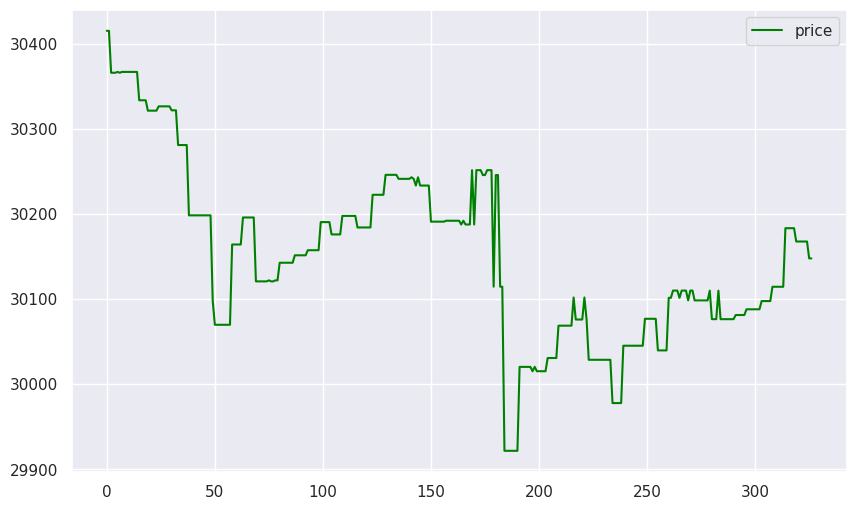

In [ ]:
#_________________________________________________________________________________________________________________________
# https://br.tradingview.com/ - RECOMENDAÇÃO DE ANÁLISE


df.plot(color = 'green',figsize = (10,6), y='price')                            # Criação do gráfico ( PREÇO / REGISTRO ___ 13H - 18H )